In [3]:
#Import Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests

#Read CSV File, Converting to DF
counties_df = pd.read_csv('../Resources/GA_Counties_Schools.CSV')
counties_df

,County_ID,County_Name,School_ID,School_Name,Percent_FRL,Address,City,State,ZipCode
0,605,Baldwin County,189,Baldwin High School,92.86,155 Ga Highway 49 W,Milledgeville,GA,31061
1,605,Baldwin County,300,Lakeview Academy,92.78,220 N Abc Dr,Milledgeville,GA,31061
2,605,Baldwin County,302,Lakeview Primary,92.92,372 Blandy Rd NW,Milledgeville,GA,31061
3,605,Baldwin County,303,Midway Hills Academy,92.90,101 Carl Vinson Rd SE,Milledgeville,GA,31061
4,605,Baldwin County,301,Midway Hills Primary,92.86,375 Blandy Rd NW,Milledgeville,GA,31061
...,...,...,...,...,...,...,...,...,...
85,792,Lowndes County,1052,W.G. Nunn Elementary,94.68,1610 Lakeland Ave,Valdosta,GA,31602
86,757,Wilkes County,205,Washington-Wilkes Elementary School,94.09,109 East St,Washington,GA,30673
87,757,Wilkes County,105,Washington-Wilkes Primary School,94.16,910 E Robert Toombs Ave,Washington,GA,30673
88,757,Wilkes County,210,Washington-Wilkes Middle School,94.22,1180 Tignall Rd,Washington,GA,30673


# Pull from Census.gov
Codes = https://www.census.gov/data/developers/data-sets/popest-popproj/popest/popest-vars.Vintage_2021.html

In [4]:
url = 'https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP,AGEGROUP&for=county:009,063,101,167,185,209,317&in=state:13'
res = requests.get(url).json()
res

[['NAME', 'POP', 'AGEGROUP', 'state', 'county'],
 ['Johnson County, Georgia', '9643', '0', '13', '167'],
 ['Johnson County, Georgia', '522', '1', '13', '167'],
 ['Johnson County, Georgia', '443', '2', '13', '167'],
 ['Johnson County, Georgia', '515', '3', '13', '167'],
 ['Johnson County, Georgia', '522', '4', '13', '167'],
 ['Johnson County, Georgia', '567', '5', '13', '167'],
 ['Johnson County, Georgia', '649', '6', '13', '167'],
 ['Johnson County, Georgia', '644', '7', '13', '167'],
 ['Johnson County, Georgia', '634', '8', '13', '167'],
 ['Johnson County, Georgia', '669', '9', '13', '167'],
 ['Johnson County, Georgia', '709', '10', '13', '167'],
 ['Johnson County, Georgia', '657', '11', '13', '167'],
 ['Johnson County, Georgia', '669', '12', '13', '167'],
 ['Johnson County, Georgia', '653', '13', '13', '167'],
 ['Johnson County, Georgia', '524', '14', '13', '167'],
 ['Johnson County, Georgia', '501', '15', '13', '167'],
 ['Johnson County, Georgia', '352', '16', '13', '167'],
 ['Johns

In [24]:
# Clean Data
ageDf = pd.DataFrame(res[1:], columns = res[0])
ageDf = ageDf.astype({'AGEGROUP':'int','POP':'float'})
ageDf.to_csv('../Resources/Census_Data.csv', index = False)
ageDf = ageDf[(ageDf['AGEGROUP'] <= 18) & (ageDf['AGEGROUP'] != 0)].sort_values(by='NAME', ascending=True)
ageDf

,NAME,POP,AGEGROUP,state,county
68,"Baldwin County, Georgia",2487.0,3,13,009
142,"Baldwin County, Georgia",1333.0,16,13,009
143,"Baldwin County, Georgia",863.0,17,13,009
144,"Baldwin County, Georgia",742.0,18,13,009
66,"Baldwin County, Georgia",2113.0,1,13,009
...,...,...,...,...,...
100,"Wilkes County, Georgia",494.0,1,13,317
101,"Wilkes County, Georgia",572.0,2,13,317
102,"Wilkes County, Georgia",621.0,3,13,317
135,"Wilkes County, Georgia",568.0,10,13,317


In [52]:
newDf = ageDf[ageDf['county'] == '009']
newDf['NAME'].array[0]

'Baldwin County, Georgia'

In [77]:
censusUrl = 'https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP,AGEGROUP,RACE&for=county:009,063,101,167,185,209,317&in=state:13'
censusRes = requests.get(censusUrl).json()
censusDf = pd.DataFrame(censusRes[1:], columns = censusRes[0])
censusDf = censusDf.astype({'AGEGROUP':'int','POP':'float'})
censusDf

,NAME,POP,AGEGROUP,RACE,state,county
0,"Johnson County, Georgia",9643.0,0,0,13,167
1,"Johnson County, Georgia",6153.0,0,1,13,167
2,"Johnson County, Georgia",3306.0,0,2,13,167
3,"Johnson County, Georgia",41.0,0,3,13,167
4,"Johnson County, Georgia",39.0,0,4,13,167
...,...,...,...,...,...,...
1682,"Clayton County, Georgia",1922.0,27,0,13,063
1683,"Clayton County, Georgia",220117.0,28,0,13,063
1684,"Clayton County, Georgia",211634.0,29,0,13,063
1685,"Clayton County, Georgia",126059.0,30,0,13,063


In [80]:

curCountyData = censusDf[censusDf['county'] == '063']
filData = curCountyData[(curCountyData['AGEGROUP'] <= 18) & (curCountyData['AGEGROUP'] != 0)].sort_values(by='NAME', ascending=True)
curCounty = filData['NAME'].array[0]
filData = filData.sort_values(by='RACE', ascending=True)
# Resources: Change Race Code to Desc Values
raceDesc = ['Not Specified', 'White', 'African American', 'American Indian', 'Asian', 'Pacific Islander', 'Mixed', 'White or Mixed', 'African American or Mixed', 'American Indian or Mixed', 'Asian or Mixed', 'Pacific Islander or Mixed']
for x in range(12):
    filData['RACE'] = np.where(filData['RACE'] == str(x), raceDesc[x], filData['RACE'])
filData['RACE']

1458               Not Specified
1494               Not Specified
1554               Not Specified
1566               Not Specified
1470               Not Specified
                  ...           
1515    American Indian or Mixed
1551    American Indian or Mixed
1611    American Indian or Mixed
1479    American Indian or Mixed
1599    American Indian or Mixed
Name: RACE, Length: 216, dtype: object

In [255]:
#Y-Axis Counties
counties = ageDf['NAME'].unique()
countyData = {}

for county in counties:
    data = ageDf[ageDf['NAME'] == county]
    data = data[['AGEGROUP','POP']]
    data = data.sort_values(by = 'AGEGROUP', ascending = True)
    data = data['POP'].array
    countyData[county] = data

countyDf = pd.DataFrame(countyData).astype('int')
countyDf

,"Baldwin County, Georgia","Clayton County, Georgia","Echols County, Georgia","Johnson County, Georgia","Lowndes County, Georgia","Montgomery County, Georgia","Wilkes County, Georgia"
0,2113,21815,210,522,8014,483,494
1,2278,22584,354,443,8037,520,572
2,2487,23312,314,515,7997,511,621
3,4360,21294,271,522,9338,701,582
4,5430,20279,214,567,14158,763,517
5,2846,24956,250,649,9783,602,529
6,2420,21696,332,644,7999,559,495
7,2452,19609,252,634,7247,541,504
8,2229,18225,289,669,6114,515,455
9,2458,19144,268,709,6041,590,568


In [261]:
#Y-Axis Age Groups
ageGroups = ageDf
ages = ageGroups.sort_values(by = 'AGEGROUP', ascending = True)['AGEGROUP'].unique()
ageData = {}

for age in ages:
    data = ageDf[ageDf['AGEGROUP'] == age]
    data = data[['NAME','POP']]
    data = data.sort_values(by = 'NAME', ascending = True)
    data = data['POP'].array
    ageData[age] = data

ageGroupDf = pd.DataFrame(ageData).astype('int')
ageGroupDf

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2113,2278,2487,4360,5430,2846,2420,2452,2229,2458,2631,2925,2863,2452,2008,1333,863,742
1,21815,22584,23312,21294,20279,24956,21696,19609,18225,19144,18393,17537,15245,11477,7776,4483,2509,1922
2,210,354,314,271,214,250,332,252,289,268,211,267,221,188,142,77,78,68
3,522,443,515,522,567,649,644,634,669,709,657,669,653,524,501,352,182,231
4,8014,8037,7997,9338,14158,9783,7999,7247,6114,6041,5833,6360,5691,4866,3946,2679,1752,1551
5,483,520,511,701,763,602,559,541,515,590,572,621,588,536,436,283,233,118
6,494,572,621,582,517,529,495,504,455,568,630,715,775,619,612,469,309,311


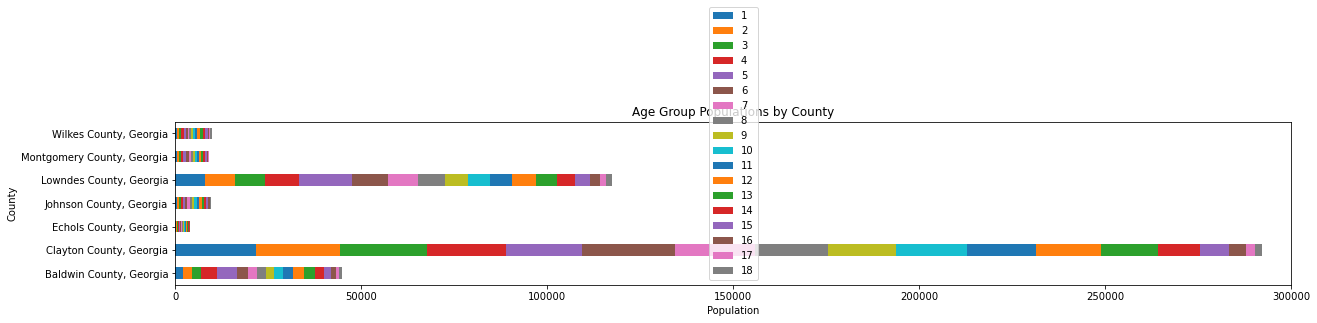

In [257]:
## Establish Graph Elements

#Set The Figure Size For Both Figures
plt.rcParams["figure.figsize"] = (20,3)

#Transpose and Convert DF to Horizontal Stacked Bar Graph with Title
countyPlot = countyDf.T.plot.barh(stacked = True, title = 'Age Group Populations by County')

#Set Figure Limits to Match Female
plt.xlim([0, 300000])

#Set Axis Labels
plt.xlabel('Population')
plt.ylabel('County')

#Configure Legend for Male
countyPlot.legend(ages)

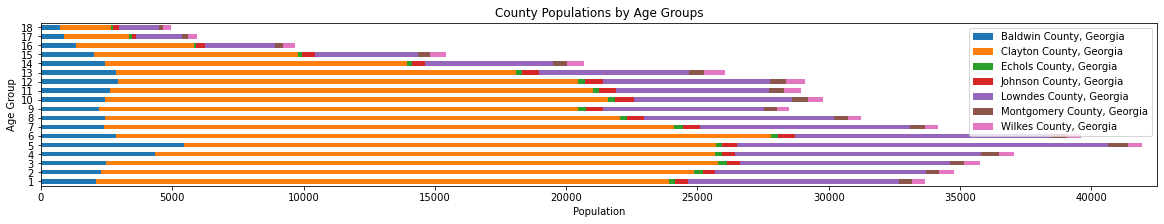

In [262]:
## Establish Graph Elements

#Set The Figure Size For Both Figures
plt.rcParams["figure.figsize"] = (20,3)

#Transpose and Convert DF to Horizontal Stacked Bar Graph with Title
agePlot = ageGroupDf.T.plot.barh(stacked = True, title = 'County Populations by Age Groups')

#Set Figure Limits to Match Female
plt.xlim([0, 42500])

#Set Axis Labels
plt.xlabel('Population')
plt.ylabel('Age Group')

#Configure Legend for Male
agePlot.legend(counties)